<br><br><br>
<center> <h3 style="color:blue">========================================================</h3> </center>
<center> <h3 style="color:green">Pulp Optimization</h3> </center>
<center> <h3 style="color:blue">========================================================</h3> </center>
<br><br><br>

# Import Libraries

In [33]:
import time
from pulp import LpMinimize
from pulp import LpMaximize
from pulp import LpProblem
from pulp import LpStatus
from pulp import lpSum
from pulp import LpVariable
from pulp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Build Model

In [34]:
model = LpProblem(name='small-problem', sense=LpMinimize)

In [35]:
T = LpVariable(name="T", lowBound=0)
C = LpVariable(name="C", lowBound=0)

In [36]:
model += (2 * T + C <= 20, "first_constraint")
model += (4 * T - 5 * C >= -10, "second_constraint")
model += (-T + 2 * C >= -2, "third_constraint")
model += (-T + 5 * C == 15, "fourth_constraint")

# Objective Function

In [37]:
obj_func = 80*T - 2*8.314*C
model += obj_func

In [42]:
status_id = []
status_list = []
objective = []
itr_time = []
n_of_trials_collection = []
for n in range(50): 
    start = time.time()
    
    status = model.solve(PULP_CBC_CMD( mip=True) )
    
    status_id.append(model.status)
    status_list.append(LpStatus[model.status])
    n_of_trials = abs(int(np.round(np.random.randn(1)*5 + 10))) + 10
    n_of_trials_collection.append(n_of_trials)
    end = time.time()
    timetaken = end - start
    itr_time.append(timetaken)
    objective.append(model.objective.value())

In [43]:
print("\n\n\n==========================================")
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")
print("==========================================\n\n\n")




status: 1, Optimal
objective: 77.9066698876





# Plot Time in Graph

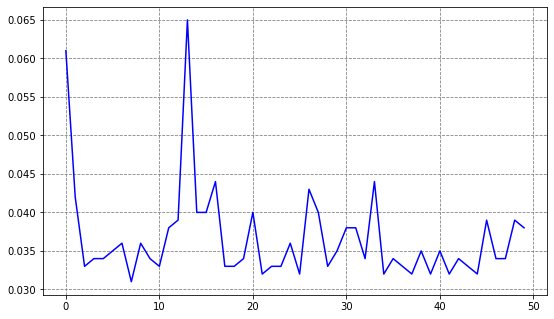

In [44]:
data = itr_time
fig = plt.figure()
fig.set_size_inches(7, 4)
ax = fig.add_axes([0,0,1,1])
plt.plot(data,color = 'blue')
plt.rc('grid', linestyle="--", color='gray')
plt.grid(True)
plt.show()

# Show Results in Table

In [45]:
df = pd.DataFrame()
df["number of trials"] = n_of_trials_collection
df["number of parameters"] = '2'
df["type of function"] = "Linear"
df["accuracy"] = '1'
df["Value"] = [round(obj, 4) for obj in objective]
df["Time (sec)"] = [round(time, 3) for time in itr_time]
df["type_of_opt"] = model.solver.name
pd.set_option("display.max_rows", None, "display.max_columns", None)
table1 = df.copy()

In [47]:
results = table1
results.to_csv('Pulp.csv')
print(tabulate(results, results.columns, tablefmt="pretty",showindex="never"))

+------------------+----------------------+------------------+----------+---------+------------+--------------+
| number of trials | number of parameters | type of function | accuracy |  Value  | Time (sec) | type_of_opt  |
+------------------+----------------------+------------------+----------+---------+------------+--------------+
|        20        |          2           |      Linear      |    1     | 77.9067 |   0.061    | PULP_CBC_CMD |
|        19        |          2           |      Linear      |    1     | 77.9067 |   0.042    | PULP_CBC_CMD |
|        17        |          2           |      Linear      |    1     | 77.9067 |   0.033    | PULP_CBC_CMD |
|        19        |          2           |      Linear      |    1     | 77.9067 |   0.034    | PULP_CBC_CMD |
|        16        |          2           |      Linear      |    1     | 77.9067 |   0.034    | PULP_CBC_CMD |
|        17        |          2           |      Linear      |    1     | 77.9067 |   0.035    | PULP_CB

<br><br><br>
<center> <h3 style="color:blue">========================================================</h3> </center>
<center> <h3 style="color:green">Thank you so much</h3> </center>
<center> <h3 style="color:blue">========================================================</h3> </center>
<br><br><br>